# Principal Component Analysis
Principal component analysis (PCA) is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components.

This reduces the computational complexities required to deal with multiple features.<br>
At the same time, if the dimenions gets reduced to less than" 3 , it is easy to visualize also. 
### Data
The Data consists of the specifications of the laptops and the categories of the same.<br>
**Specifications** are : <br>
1) CPU Speed<br>
2) RAM<br>
3) Hard Disk <br>
4) Price <br>
**Categories** possible are: <br>
1) Personal<br>
2) Business<br>
3) Gaming<br>

**Note**:The data used in this example is generated in using a python program.

### Aim

Currently the category is speicified based on 4 parameters Price,Speed,Ram,Storage. But as the data increases it will be computationally expensive to calculate 4 features. Hence, using the principle component analysis the dimensions of the data set is reduced to two.

### Libraries Used

In [1]:
import pylab as pl
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn import model_selection,svm
from numpy import random, array
from itertools import cycle
from pylab import *
%matplotlib inline

### Loading the data

In [2]:
df = pd.read_csv("Data/LaptopPrice.csv")
df.head()

,Price,Speed,Ram,HDD,Class
0,136.55,0.52,1821,1088,Personal
1,182.98,2.28,1825,885,Personal
2,127.35,-0.41,2516,1014,Personal
3,150.76,1.17,1396,665,Personal
4,111.09,0.60,1898,1192,Personal


### Mapping of the Target data and Extracting the features
The data has to be mapped to numerical values for the calculation purposes.

In [3]:
d = {'Personal': 1, 'Business': 2,  'Gaming': 3 }
target_names = ['Personal', 'Business',  'Gaming'] 
df['Class'] = df['Class'].map(d)
features = df.drop('Class', axis=1).as_matrix()
target = np.squeeze(df.filter(['Class'], axis=1).as_matrix())

### Splitting test and train

In [4]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(features, target, test_size=0.4, random_state=1)

### SVC Training and Test Score without PCA

In [5]:
clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
print("Train R2 Score : "+ str(clf.score(X_train, y_train)   ))
print("Test R2 Score "+str(clf.score(X_test, y_test)   ))

Train R2 Score : 1.0
Test R2 Score 0.825


#### Observation
The model is overfitting as the Training R2 score is high and Test score is low.

## Principal Component Analysis
PCA function is used to reduce the number of dimensions. <br>
Parameters used: <br>
n_components - 2 (Dimension after transformation)<br>
Whiten = True (To ensure uncorrelated outputs )<br>

In [6]:
pca = PCA(n_components=2, whiten=True).fit(X_train)
TransformedFeatures = pca.transform(features)
TransformedTrainFeatures = pca.transform(X_train)
TransformedTestFeatures= pca.transform(X_test)

### New Variance

After the reduction to 2 dimensions. The Varaince in the data preserved is checked.

In [7]:
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[ 0.93625913  0.05768887]
0.993947998968


#### Observation 
With one dimension, the model was able preserve **92** % of the variance and <br>
Second dimension hold **7%** of the variance, <br>
So combinedly, the even with reduction to **two dimensions**, still **99 %** of the variance is preserved.

### Plotting the graph 
The data based on the new two dimensions are used to plot

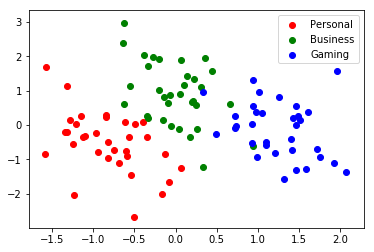

In [8]:
colors = cycle('rgb')
target_ids = range(1,len(target_names)+1)
#pl.figure()
for i, c, label in zip(target_ids, colors, target_names):
    pl.scatter(TransformedFeatures[target == i, 0], TransformedFeatures[target == i, 1],
        c=c, label=label)
pl.legend()
pl.show()
    

#### Observation:
As we can observe in the graph, the data is can be loosely classified into 3 sectors.

### Training and Test Scores

Using SVC to train the model based on this new **reduced dimenion** data set and<br> 
checking the R2 Scores

In [9]:
clf = svm.SVC(kernel='linear', C=1).fit(TransformedTrainFeatures, y_train)

print("Train R2 Score : "+ str(clf.score(TransformedTrainFeatures, y_train)   ))
print("Test R2 Score "+str(clf.score(TransformedTestFeatures, y_test)   ))

Train R2 Score : 0.966101694915
Test R2 Score 0.9


#### Observation:
The Test accuracy have increased than the original dataset and train accuracy has reduced. <br>
Plausible Cause: Reduction of dimension removed the overfitting of the classification in the SVC which created a better R2 Score.


### Result
The Principal component analysis helped in reducing the number of dimension which will help in reducing the training time for large dataset.



### Conclusion
The PCA method was successfully used in reducing the number of dimension for the dataset 